<center>
<h1> TP-Projet d'optimisation numérique </h1>
<h1> Algorithme des Régions de Confiance </h1>
</center>

# Régions de confiance avec Pas de Cauchy 

## Implémentation 

1. Coder l'algorithme du pas de Cauchy d’un sous-problème de
régions de confiance (fichier `Pas_De_Cauchy.jl`). La spécification de cet algorithme est donnée ci-dessous.

In [2]:
using LinearAlgebra
using Documenter
using Markdown 
include("Pas_De_Cauchy.jl")
@doc Pas_De_Cauchy

#### Objet

Cette fonction calcule une solution approchée du problème

$$
\min_{||s||< \Delta} s^{t}g + \frac{1}{2}s^{t}Hs
$$

par le calcul du pas de Cauchy.

#### Syntaxe

```julia
s, e = Pas_De_Cauchy(g,H,Δ)
```

#### Entrées

  * g : (Array{Float,1}) un vecteur de $\mathbb{R}^n$
  * H : (Array{Float,2}) une matrice symétrique de $\mathbb{R}^{n\times n}$
  * Δ  : (Float) le rayon de la région de confiance

#### Sorties

  * s : (Array{Float,1}) une approximation de la solution du sous-problème
  * e : (Integer) indice indiquant l'état de sortie:      si g != 0          si on ne sature pas la boule            e <- 1          sinon            e <- -1      sinon          e <- 0

#### Exemple d'appel

```julia
g = [0; 0]
H = [7 0 ; 0 2]
Δ = 1
s, e = Pas_De_Cauchy(g,H,Δ)
```


2. Ecrire des tests exhaustifs (qui testent tous les cas de figure possibles) pour votre algorithme du Pas de Cauchy. Vous créerez pour cela un fichier `tester_pas_de_Cauchy.jl` dans le répertoire `test` sur le modèle des autres fichiers de tests et vous exécuterez dans la cellule de code ci-après ces tests.

In [3]:
using Test

# Tolérance pour les tests d'égalité
tol_erreur = sqrt(eps())

## ajouter les fonctions de test
include("../test/tester_pas_de_Cauchy.jl")
include("../src/Pas_De_Cauchy.jl")

affiche = false

@testset "Test pas de cauchy" begin
	# Tester le pas de cauchy
	tester_pas_cauchy(affiche,Pas_De_Cauchy)
end;

Test Summary:      | Pass  Total  Time
Test pas de cauchy |   10     10  2.0s


3. Coder l'algorithme des Régions de Confiance (fichier `Regions_De_Confiance.jl`). Sa spécification est donnée ci-dessous.

In [4]:
include("Regions_De_Confiance.jl")
@doc Regions_De_Confiance

#### Objet

Minimise une fonction de $\mathbb{R}^{n}$ à valeurs dans $\mathbb{R}$ en utilisant l'algorithme des régions de confiance.

La solution approchées des sous-problèmes quadratiques est calculé par le pas de Cauchy ou le pas issu de l'algorithme du gradient conjugue tronqué

#### Syntaxe

```julia
xmin, fxmin, flag, nb_iters = Regions_De_Confiance(algo,f,gradf,hessf,x0,option)
```

#### Entrées :

  * algo        : (String) string indicant la méthode à utiliser pour calculer le pas

      * "gct"   : pour l'algorithme du gradient conjugué tronqué
      * "cauchy": pour le pas de Cauchy
  * f           : (Function) la fonction à minimiser
  * gradf       : (Function) le gradient de la fonction f
  * hessf       : (Function) la hessiene de la fonction à minimiser
  * x0          : (Array{Float,1}) point de départ
  * options     : (Array{Float,1})

      * deltaMax       : utile pour les m-à-j de la région de confiance                $R_{k}=\left\{x_{k}+s ;\|s\| \leq \Delta_{k}\right\}$
      * gamma1, gamma2 : $0 < \gamma_{1} < 1 < \gamma_{2}$ pour les m-à-j de $R_{k}$
      * eta1, eta2     : $0 < \eta_{1} < \eta_{2} < 1$ pour les m-à-j de $R_{k}$
      * delta0         : le rayon de départ de la région de confiance
      * max_iter       : le nombre maximale d'iterations
      * Tol_abs        : la tolérence absolue
      * Tol_rel        : la tolérence relative
      * ϵ       : epsilon pour les tests de stagnation

#### Sorties:

  * xmin    : (Array{Float,1}) une approximation de la solution du problème :           $\min_{x \in \mathbb{R}^{n}} f(x)$
  * fxmin   : (Float) $f(x_{min})$
  * flag    : (Integer) un entier indiquant le critère sur lequel le programme s'est arrêté (en respectant cet ordre de priorité si plusieurs critères sont vérifiés)

      * 0    : CN1
      * 1    : stagnation du $x$
      * 2    : stagnation du $f$
      * 3    : nombre maximal d'itération dépassé
  * nb_iters : (Integer)le nombre d'iteration qu'à fait le programme

#### Exemple d'appel

```julia
algo="gct"
f(x)=100*(x[2]-x[1]^2)^2+(1-x[1])^2
gradf(x)=[-400*x[1]*(x[2]-x[1]^2)-2*(1-x[1]) ; 200*(x[2]-x[1]^2)]
hessf(x)=[-400*(x[2]-3*x[1]^2)+2  -400*x[1];-400*x[1]  200]
x0 = [1; 0]
options = []
xmin, fxmin, flag, nb_iters = Regions_De_Confiance(algo,f,gradf,hessf,x0,options)
```


4. Vérifier que les tests ci-dessous passent.

### <span style="color:red"> J'ai un problème sur ces tests, je dois parfois les lancer 2 fois pour qu'ils fonctionnent </span>  

In [5]:
using Test

# Tolérance pour les tests d'égalité
tol_erreur = sqrt(eps())

## ajouter les fonctions de test
include("../test/fonctions_de_tests.jl")
include("../test/tester_regions_de_confiance.jl")
include("../src/Pas_De_Cauchy.jl")
include("../src/Regions_De_Confiance.jl")

affiche = false

@testset "Test rc avec cauchy" begin
	tester_regions_de_confiance(affiche,Regions_De_Confiance)
end;

avec GCT : Error During Test at /home/priscilia/Cours/Optimisation/gonthier_priscilia_L2/test/tester_regions_de_confiance.jl:92
  Got exception outside of a @test
  MethodError: no method matching Gradient_Conjugue_Tronque(::Vector{Int64}, ::Matrix{Int64}, ::Vector{Float64})
  The applicable method may be too new: running in world age 32597, while current world is 32615.
  Closest candidates are:
    Gradient_Conjugue_Tronque(::Any, ::Any, ::Any) at ~/Cours/Optimisation/gonthier_priscilia_L2/src/Gradient_Conjugue_Tronque.jl:36 (method too new to be called from this world context.)
  Stacktrace:
    [1] Regions_De_Confiance(algo::String, f::typeof(fct1), gradf::typeof(grad_fct1), hessf::typeof(hess_fct1), x0::Vector{Int64}, options::Vector{Float64}; gctcommecauchy::Bool)
      @ Main ~/Cours/Optimisation/gonthier_priscilia_L2/src/Regions_De_Confiance.jl:113
    [2] Regions_De_Confiance(algo::String, f::Function, gradf::Function, hessf::Function, x0::Vector{Int64}, options::Vector{Float6

LoadError: [91mSome tests did not pass: 15 passed, 0 failed, 1 errored, 0 broken.[39m

## Interprétation 

<!-- Pour ces questions, des représentations graphiques sont attendues pour corroborer vos réponses. -->

1. Soit $$ f_{1} : \mathbf{R}^3 \rightarrow \mathbf{R}$$ $$ (x_1,x_2, x_3) \mapsto  2 (x_1 +x_2 + x_3 -3)^2 + (x_1-x_2)^2 + (x_2 - x_3)^2$$ Quelle relation lie la fonction $f_1$ et son modèle de Taylor à l’ordre 2 ? Comparer alors les performances de Newton et RC-Pas de Cauchy sur cette fonction.


2.  Le rayon initial de la région de confiance est un paramètre important dans l’analyse
de la performance de l’algorithme. Sur quel(s) autre(s) paramètre(s) peut-on jouer
pour essayer d’améliorer cette performance ? Étudier l’influence d’au moins deux de ces paramètres. Pour cela vous ferez des tests numériques et donnerez les résultats sous forme de tableaux et de graphiques.


## Réponses

In [6]:
using LaTeXStrings
using Plots
## ajouter les fonctions de lancement 
include("../test/fonctions_de_tests.jl")
include("../src/Pas_De_Cauchy.jl")
include("../src/Regions_De_Confiance.jl")
include("../src/Algorithme_De_Newton.jl")
include("../src/Affichages_Regions_De_Confiance.jl")

comparaison_regions_de_confiance_newton(Regions_De_Confiance, Algorithme_De_Newton)


erreur region de confiance : [0.0, 9.07114607535824e-5, 7.623635399992725e-5]

erreur newton : [0.0, 1.1102230246251565e-16, 1.4043333874306805e-15]

iter region de confiance : [0, 26, 28]

iter newton : [0, 1, 1]


1. La fonction test $f_1$ est liée à son modèle de Taylor à l’ordre 2 par la relation : 
$$ m_{k} (s) = f_1(x_{k}) + g_{k}^{T}s + \frac{1}{2} s^{T} H_{k} s $$ or $f_1$ est quadratique donc égal au modèle de taylor à l'ordre 2 dans ce cas.
       
  perf de cauchy et newton sur les fonctions de test
  
  <div align="center">Comparaison du nombre d'itération entre l'algorithme de newton et RC-Cauchy</div>

 | cas de test | Newton | RC-Cauchy |
  | :-: | :-: | :-: |
  | $f_1$, $Sol_{exacte}$ | 0 | 26 |
  | $f_1$, $x_{011}$ | 0 | 26 |
  | $f_1$, $x_{012}$ | 1 | 28 |  
  
    
  
  <div align="center">Comparaison de l'erreur absolue entre l'algorithme de newton et RC-Cauchy</div>  

| cas de test | Newton | RC-Cauchy |
  | :-: | :-: | :-: |
  | $f_1$, $Sol_{exacte}$ | 0 | 0 |
  | $f_1$, $x_{011}$ | 1.1e-16 | 9.07e-5 |
  | $f_1$, $x_{012}$ | 1.4e-15 | 7.62e-5 |

Sur cette fonction l'algorithme RC-Pas de Cauchy était moins performant que l'algorithme de Newton, puisque il lui fallut beaucoup plus d'iterations que l'algo Newton pour converger. 
   
   
L'algorithme de newton minimise en approchant la fonction par une quadratique. Ici notre fonction $f_1$  est déjà quadratique donc c'est pour cela que l'on a une bonne précision avec un nombre d'itérarion très faible. Pour le pas de cauchy on par dans une direction, donc il y a possibilité de faire des pas en trop, ce qui est le cas ici.

  

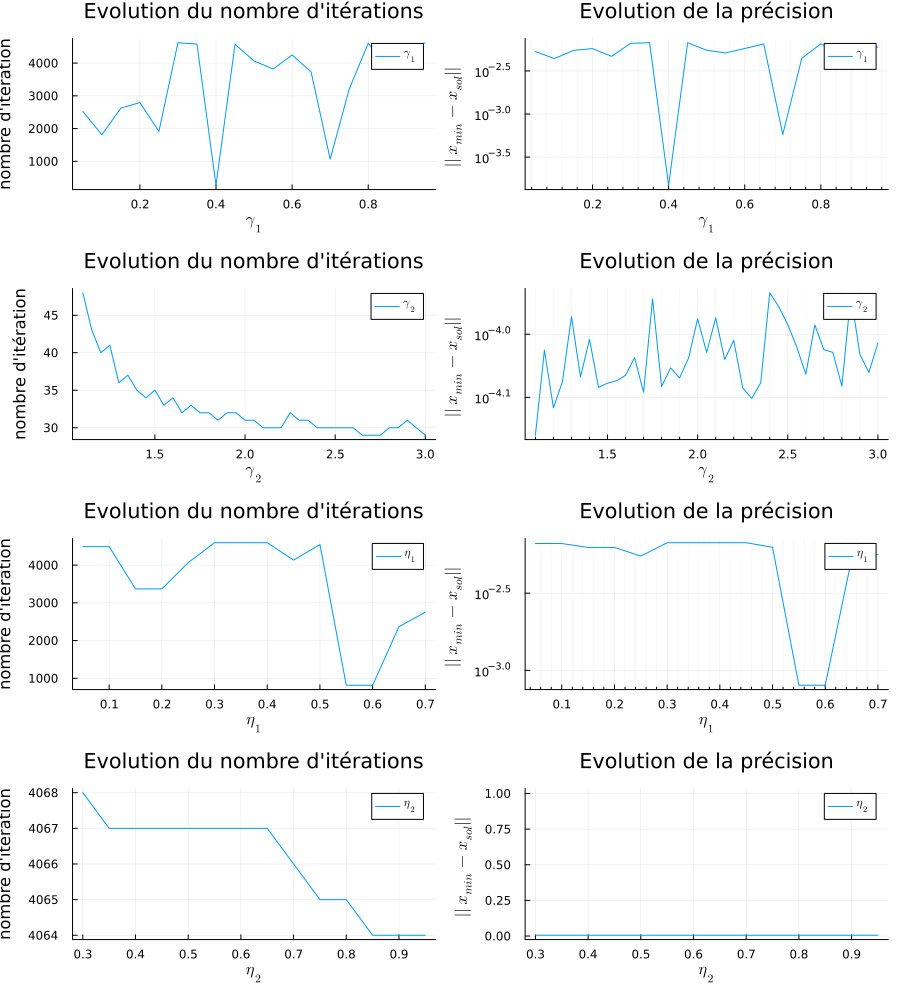

In [7]:
using LaTeXStrings
using Plots
# Graphique et tableau de résultat réponse au 2

## ajouter les fonctions de lancement 
include("../test/fonctions_de_tests.jl")
include("../src/Pas_De_Cauchy.jl")
include("../src/Regions_De_Confiance.jl")
include("../src/Affichages_Regions_De_Confiance.jl")

afficher_regions_de_confiance(Regions_De_Confiance)

2. On peut jouer sur plusieurs paramètres pour essayer d'améliorer cette performance :
- $\Delta_{max}$ : Le rayon maximal de la région de confiance.
- $\gamma_1$ et $\gamma_2$ : avec $0<\gamma_1<1\le\gamma_2$ critères d'actualisation.
- $\gamma_1$ et $\eta_2$ : avec $0<\eta_1<\eta_2<1$ critères de performance.

Pour essayer d’améliorer la performance de RC-Pas de Cauchy, On peut jouer sur les parametres $\gamma_{1}$, $\gamma_{2}$, $\eta_{1}$ et $\eta_{2}$. Si on diminue $\eta_{2}$, on attend à ce qu'on obtient beaucoup d'iterations réussissent et donc que le nombre d'itération augmente (sur le graphique la variation est faible). Si on augmente $\gamma_{2}$, on attends à ce que delta augmente vite, et donc on approche à la solution plus vite.

Cela est bien confirmé par les courbes qui ont été tracées. Pour la précision de l'algorithme, la variation d'$\eta_{2}$ ne change rien. Les autres courbes (pour $\gamma_1$, $\eta_1$ et la précision de $\gamma_{2}$) les résultats sont difficilement exploitables.


# Régions de confiance avec Gradient Conjugué
## Implémentation 

1. Implémenter l’algorithme du Gradient Conjugué Tronqué (fichier `Gradient_Conjugue_Tronque.jl`). Sa spécification est donnée ci-dessous.

In [8]:
include("Gradient_Conjugue_Tronque.jl")
@doc Gradient_Conjugue_Tronque

#### Objet

Cette fonction calcule une solution approchée du problème

$$
\min_{||s||< \Delta}  q(s) = s^{t} g + \frac{1}{2} s^{t}Hs
$$

par l'algorithme du gradient conjugué tronqué

#### Syntaxe

```julia
s = Gradient_Conjugue_Tronque(g,H,option)
```

#### Entrées :

  * g : (Array{Float,1}) un vecteur de $\mathbb{R}^n$
  * H : (Array{Float,2}) une matrice symétrique de $\mathbb{R}^{n\times n}$
  * options          : (Array{Float,1})

      * Δ    : le rayon de la région de confiance
      * max_iter : le nombre maximal d'iterations
      * tol      : la tolérance pour la condition d'arrêt sur le gradient

#### Sorties:

  * s : (Array{Float,1}) le pas s qui approche la solution du problème : $min_{||s||< \Delta} q(s)$

#### Exemple d'appel:

```julia
gradf(x)=[-400*x[1]*(x[2]-x[1]^2)-2*(1-x[1]) ; 200*(x[2]-x[1]^2)]
hessf(x)=[-400*(x[2]-3*x[1]^2)+2  -400*x[1];-400*x[1]  200]
xk = [1; 0]
options = []
s = Gradient_Conjugue_Tronque(gradf(xk),hessf(xk),options)
```


2. Vérifier que les tests ci-dessous passent.

In [9]:
using Test

# Tolérance pour les tests d'égalité
tol_erreur = sqrt(eps())

## ajouter les fonctions de test
include("../test/fonctions_de_tests.jl")
include("../test/tester_gct.jl")
include("../src/Gradient_Conjugue_Tronque.jl")

affiche = true

@testset "Test gct" begin
	tester_gct(affiche,Gradient_Conjugue_Tronque)
end;

Test Summary: | Pass  Total  Time
Test gct      |   11     11  1.1s


3. Intégrer l’algorithme du Gradient Conjugué Tronqué dans le code de régions de confiance (fichier `Regions_De_Confiance.jl`).

4. Décommenter les tests avec le gradient conjugué dans `tester_regions_de_confiance.jl` et vérifier que les tests passent.

In [10]:
using Test

# Tolérance pour les tests d'égalité
tol_erreur = sqrt(eps())

## ajouter les fonctions de test
include("../test/fonctions_de_tests.jl")
include("../test/tester_regions_de_confiance.jl")
include("../src/Pas_De_Cauchy.jl")
include("../src/Gradient_Conjugue_Tronque.jl")
include("../src/Regions_De_Confiance.jl")

affiche = false

@testset "Test rc avec cauchy et gct" begin
	tester_regions_de_confiance(affiche,Regions_De_Confiance)
end;

Test Summary:              | Pass  Total  Time
Test rc avec cauchy et gct |   30     30  1.7s


## Interprétation  

1. Comparer la décroissance obtenue avec celle du pas de Cauchy, en imposant la sortie
dans l’algorithme au bout d’une itération seulement. Vous donnerez ci-après des résultats numériques. 
    Que remarquez vous ?
    
2. Comparer la décroissance obtenue avec celle du pas de Cauchy dans le cas général.
    

3. Quels sont les avantages et inconvénients des deux approches ?


## Réponses

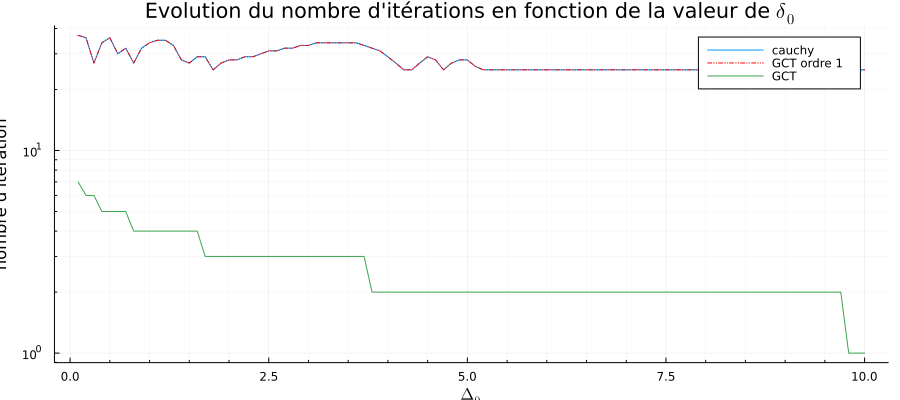

In [22]:
using LaTeXStrings
using Plots

## ajouter les fonctions de test
include("../test/fonctions_de_tests.jl")
include("../test/tester_regions_de_confiance.jl")
include("../src/Pas_De_Cauchy.jl")
include("../src/Gradient_Conjugue_Tronque.jl")
include("../src/Regions_De_Confiance.jl")
include("../src/Affichages_Regions_De_Confiance.jl")

comparaison_cauchy_gct(Regions_De_Confiance)


1. La décroissance obtenue est la même que celle du pas de cauchy, cela veut dire que le GCT commence dans la même direction que le pas de cauchy. En traçant la courbe du nombre d'itération en fonction de $\Delta_0$ pour la fonction $f_1$ au point initial $x_{012}$, on observe bien que la courbe du GCT réduite à une itération et la courbe de cauchy se superposent.
      
2. En général l'algorithme GCT est terminé en nettement moins d'itérations que pour le pas de cauchy.  
Car on affine cauchy où l'algorithme est limité à une itération ce qui n'est pas le cas du GCT.
On peut l'observer sur la courbe ci-dessus. 
  
3. L'algorithme avec le pas de Cauchy est plus efficace en temps de calcul que celle du gradient conjugué tronqué car c'est un calcul direct, mais GCT est plus précis dans le calcul de la solution s renvoyée. Le pas entre $x_k$ et $x_{k+1} sera donc plus rapide à calculer en temps avec la première approche, mais la précision de l'évolution avec la deuxième approche permettra de trouver la solution par l'algorithme de région de confiance plus rapidement, le nombre d'itération dans la boucle de l'algorithme de région de confiance est plus faible avec la deuxième méthode. Les deux méthodes ont donc chacune leurs avantages par rapport au temps de calcul sur l'algortihme global.